In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [2]:
df = pd.read_csv("googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [4]:
df.shape

(10841, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
list(df.columns)

['App',
 'Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

# CHECKING MISSING VALUE & DUPLICATE VALUE

In [7]:
# Missing values in dataframe

df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
df.isna().sum().sum()

1487

In [9]:
# Droping missing values from DataFrame

df_1 = df.dropna(how = 'any')

In [10]:
df_1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [11]:
# Checking duplicates in DataFrame (df)
df_1.duplicated(subset = None, keep = 'first').sum()

474

In [12]:
# Droping Duplicates-

df_1.drop_duplicates(subset = None, keep = 'first', inplace = True)

<ipython-input-12-b2b92b47b6ec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.drop_duplicates(subset = None, keep = 'first', inplace = True)


In [13]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8886 non-null   object 
 1   Category        8886 non-null   object 
 2   Rating          8886 non-null   float64
 3   Reviews         8886 non-null   object 
 4   Size            8886 non-null   object 
 5   Installs        8886 non-null   object 
 6   Type            8886 non-null   object 
 7   Price           8886 non-null   object 
 8   Content Rating  8886 non-null   object 
 9   Genres          8886 non-null   object 
 10  Last Updated    8886 non-null   object 
 11  Current Ver     8886 non-null   object 
 12  Android Ver     8886 non-null   object 
dtypes: float64(1), object(12)
memory usage: 971.9+ KB


In [14]:
df_1.shape

(8886, 13)

# CLEANING DATA

In [15]:
# Size column reshaping
# scaling and cleaning size of installation

def change_size(size):
    if "M" in size:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    elif "k" in size:
        x = size[:-1]
        x = float(x)
        return(x)
    else:
        return None

df_1["Size"] =df_1["Size"].map(change_size)

# filling size which had NaN

df_1.Size.fillna(method = 'ffill', inplace = True)

<ipython-input-15-bd463f707001>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["Size"] =df_1["Size"].map(change_size)
C:\Users\sharmila_biyani\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [16]:
df_1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.0,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,3600.0,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [17]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8886 non-null   object 
 1   Category        8886 non-null   object 
 2   Rating          8886 non-null   float64
 3   Reviews         8886 non-null   object 
 4   Size            8886 non-null   float64
 5   Installs        8886 non-null   object 
 6   Type            8886 non-null   object 
 7   Price           8886 non-null   object 
 8   Content Rating  8886 non-null   object 
 9   Genres          8886 non-null   object 
 10  Last Updated    8886 non-null   object 
 11  Current Ver     8886 non-null   object 
 12  Android Ver     8886 non-null   object 
dtypes: float64(2), object(11)
memory usage: 971.9+ KB


In [18]:
# Checking Reviews and converting to numeric

df_1["Reviews"].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [19]:
df_1["Reviews"] = df_1["Reviews"].astype(float)

<ipython-input-19-14ebcc2ba4b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["Reviews"] = df_1["Reviews"].astype(float)


In [20]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8886 non-null   object 
 1   Category        8886 non-null   object 
 2   Rating          8886 non-null   float64
 3   Reviews         8886 non-null   float64
 4   Size            8886 non-null   float64
 5   Installs        8886 non-null   object 
 6   Type            8886 non-null   object 
 7   Price           8886 non-null   object 
 8   Content Rating  8886 non-null   object 
 9   Genres          8886 non-null   object 
 10  Last Updated    8886 non-null   object 
 11  Current Ver     8886 non-null   object 
 12  Android Ver     8886 non-null   object 
dtypes: float64(3), object(10)
memory usage: 971.9+ KB


In [21]:
# Scaling & cleaning of Installs classification

df_1["Installs"] = [int(i [:-1].replace(',',''))for i in df_1["Installs"]]

<ipython-input-21-5ed05d76f4d4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["Installs"] = [int(i [:-1].replace(',',''))for i in df_1["Installs"]]


In [22]:
df_1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7.0,2600.0,500,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53000.0,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3600.0,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,3600.0,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [23]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8886 non-null   object 
 1   Category        8886 non-null   object 
 2   Rating          8886 non-null   float64
 3   Reviews         8886 non-null   float64
 4   Size            8886 non-null   float64
 5   Installs        8886 non-null   int64  
 6   Type            8886 non-null   object 
 7   Price           8886 non-null   object 
 8   Content Rating  8886 non-null   object 
 9   Genres          8886 non-null   object 
 10  Last Updated    8886 non-null   object 
 11  Current Ver     8886 non-null   object 
 12  Android Ver     8886 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 971.9+ KB


In [24]:
# Converting Price ti Int64 while droping "$"
df_1['Price'] = [int(i[-1:]) for i in df_1["Price"]]

<ipython-input-24-fa1ac96672cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Price'] = [int(i[-1:]) for i in df_1["Price"]]


In [25]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8886 non-null   object 
 1   Category        8886 non-null   object 
 2   Rating          8886 non-null   float64
 3   Reviews         8886 non-null   float64
 4   Size            8886 non-null   float64
 5   Installs        8886 non-null   int64  
 6   Type            8886 non-null   object 
 7   Price           8886 non-null   int64  
 8   Content Rating  8886 non-null   object 
 9   Genres          8886 non-null   object 
 10  Last Updated    8886 non-null   object 
 11  Current Ver     8886 non-null   object 
 12  Android Ver     8886 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 971.9+ KB


In [26]:
df_1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7.0,2600.0,500,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53000.0,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3600.0,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,3600.0,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [29]:
df_1["Type"].value_counts()

Free    8275
Paid     611
Name: Type, dtype: int64

In [32]:
#Converting Type classification into binary

def type_cat(types):
    if types == 'Free':
        return 0
    else:
        return 1
df_1["Type"] = df_1["Type"].map(type_cat).astype(float)

<ipython-input-32-715fb09de1a5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["Type"] = df_1["Type"].map(type_cat).astype(float)


In [30]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8886 non-null   object 
 1   Category        8886 non-null   object 
 2   Rating          8886 non-null   float64
 3   Reviews         8886 non-null   float64
 4   Size            8886 non-null   float64
 5   Installs        8886 non-null   int64  
 6   Type            8886 non-null   object 
 7   Price           8886 non-null   int64  
 8   Content Rating  8886 non-null   object 
 9   Genres          8886 non-null   object 
 10  Last Updated    8886 non-null   object 
 11  Current Ver     8886 non-null   object 
 12  Android Ver     8886 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 971.9+ KB


# SANITY CHECK

In [33]:
# Converting Rating to Float

df_1['Rating'] = df_1["Rating"].astype(float)

<ipython-input-33-0583a333282b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Rating'] = df_1["Rating"].astype(float)


In [34]:
# Checking Rating and droping anything is lower than 1 & above than 5

df["Rating"].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [35]:
df_1["Rating"].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , 4.8, 4.9, 3.6,
       3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [36]:
df.iloc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                                 19
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [37]:
rating_1 = df_1[df_1['Rating']>5].index
rating_1

# df.drop(df[df['Rating'] > 5].index)

Int64Index([], dtype='int64')

In [38]:
# Droping rating above 5, if any

df_1.drop(df_1[df_1["Rating"] > 5].index)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,0.0,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,0.0,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.0,5000000,0.0,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000,0.0,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,100000,0.0,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7.0,2600.0,500,0.0,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53000.0,5000,0.0,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3600.0,100,0.0,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,3600.0,1000,0.0,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [39]:
df["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [40]:
df_1["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [41]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8886 non-null   object 
 1   Category        8886 non-null   object 
 2   Rating          8886 non-null   float64
 3   Reviews         8886 non-null   float64
 4   Size            8886 non-null   float64
 5   Installs        8886 non-null   int64  
 6   Type            8886 non-null   float64
 7   Price           8886 non-null   int64  
 8   Content Rating  8886 non-null   object 
 9   Genres          8886 non-null   object 
 10  Last Updated    8886 non-null   object 
 11  Current Ver     8886 non-null   object 
 12  Android Ver     8886 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 1.3+ MB


In [42]:
# Checking Reviews more than the Installs

review_install = df_1[df_1["Reviews"] > df_1["Installs"]].index
review_install

Int64Index([2454, 4663, 5917, 6700, 7402, 8591, 10697], dtype='int64')

In [43]:
# Droping Reviews whis are more than Installs

df_1.drop(review_install, inplace = True)

C:\Users\sharmila_biyani\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [44]:
df_1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,0.0,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,0.0,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.0,5000000,0.0,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000,0.0,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,100000,0.0,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7.0,2600.0,500,0.0,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53000.0,5000,0.0,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3600.0,100,0.0,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,3600.0,1000,0.0,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [45]:
# Checking Type - Free (0) is not equals to Price - 0
np.unique(df_1.Type[0]) != np.unique(df_1.Price[0])

array([False])

# UNIVARIATE ANALYSIS

In [46]:
df_1.describe()

,Rating,Reviews,Size,Installs,Type,Price
count,8879.000000,8.879000e+03,8879.000000,8.879000e+03,8879.000000,8879.000000
mean,4.187341,4.734646e+05,22894.823572,1.651361e+07,0.068476,0.592634
std,0.522167,2.907122e+06,23327.887407,8.643694e+07,0.252575,2.226010
min,1.000000,1.000000e+00,8.500000,5.000000e+00,0.000000,0.000000
25%,4.000000,1.655000e+02,5300.000000,1.000000e+04,0.000000,0.000000
50%,4.300000,4.726000e+03,14000.000000,5.000000e+05,0.000000,0.000000
75%,4.500000,7.142000e+04,33000.000000,5.000000e+06,0.000000,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,1.000000,9.000000


In [47]:
df_2 = df_1
df_2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,0.0,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,0.0,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.0,5000000,0.0,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000,0.0,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,100000,0.0,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7.0,2600.0,500,0.0,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53000.0,5000,0.0,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3600.0,100,0.0,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,3600.0,1000,0.0,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [48]:
df_2['Price'].value_counts()

0    8288
9     575
5       4
6       3
8       3
7       2
4       2
2       1
1       1
Name: Price, dtype: int64

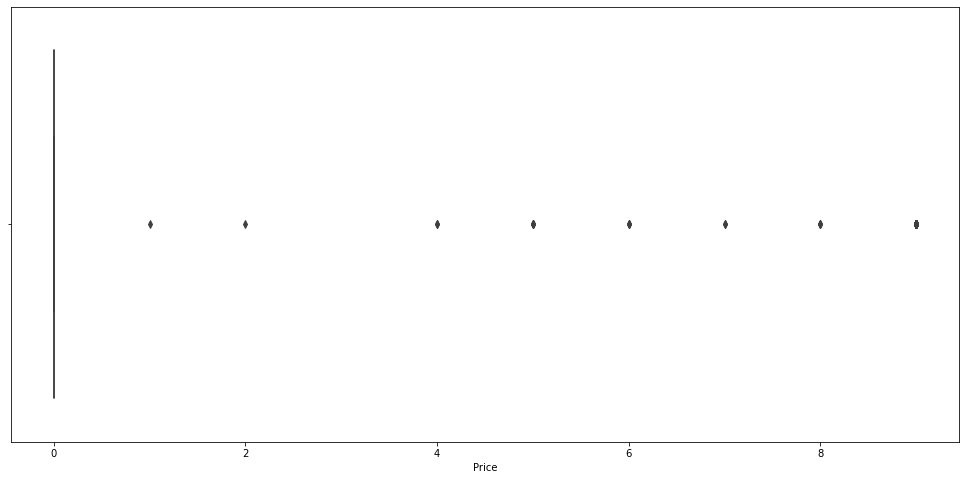

In [49]:
# Boxplot for Price 
plt.figure(figsize=[17,8])
sns.boxplot(x = df_2["Price"], orient = "h")

In [50]:
df_2["Reviews"].value_counts()

2.0          80
3.0          76
5.0          74
4.0          73
1.0          67
             ..
6850.0        1
1977.0        1
3777822.0     1
341157.0      1
1490732.0     1
Name: Reviews, Length: 5989, dtype: int64

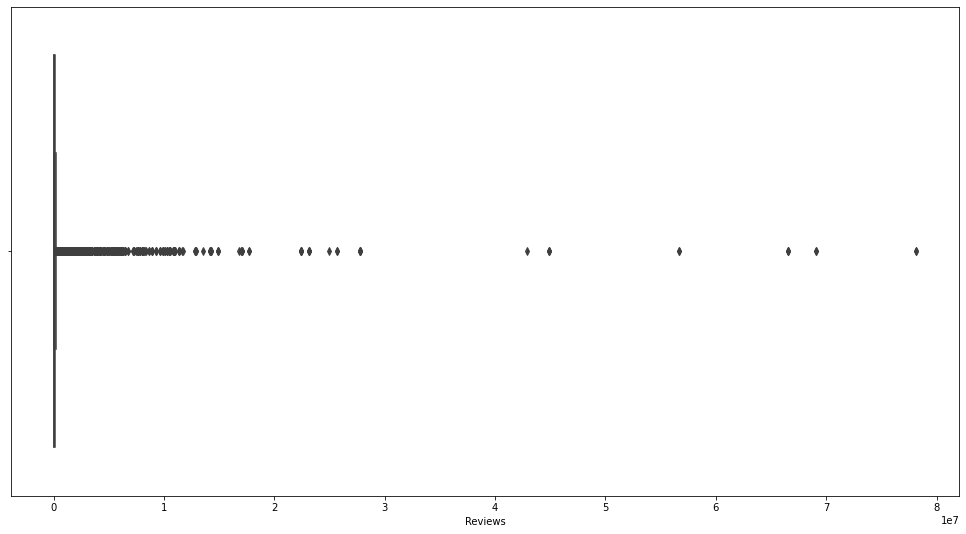

In [51]:
# Boxplot for Reviews

plt.figure(figsize=[17,9])
sns.boxplot(df_2["Reviews"], orient = "h" )

In [52]:
df_2["Rating"].value_counts()

4.4    1031
4.3    1016
4.5     976
4.2     887
4.6     768
4.1     656
4.0     538
4.7     484
3.9     372
3.8     293
5.0     265
3.7     231
4.8     227
3.6     169
3.5     157
3.4     127
3.3     101
4.9      87
3.0      82
3.1      69
3.2      63
2.9      45
2.8      40
2.6      24
2.7      23
2.5      20
2.3      20
2.4      19
1.0      16
2.2      14
2.0      12
1.9      12
1.7       8
2.1       8
1.8       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

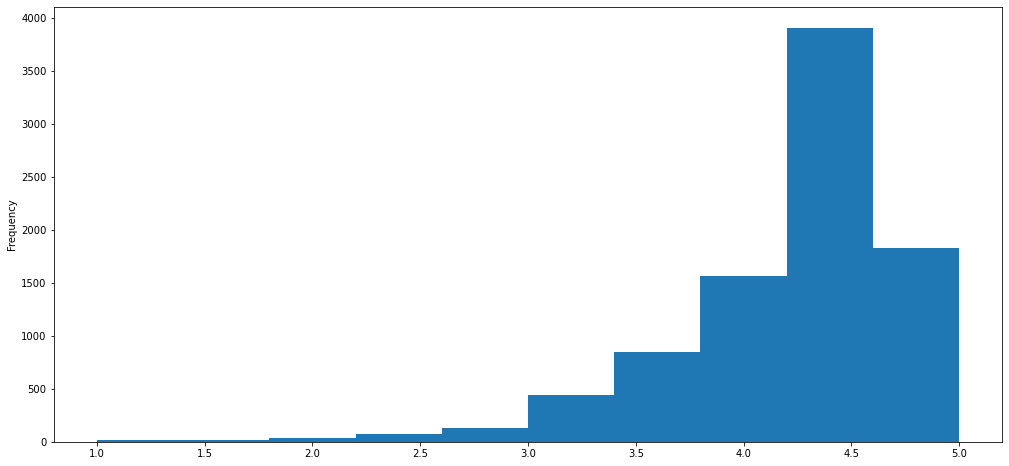

In [53]:
# Histrogram for Rating

plt.figure(figsize=[17,8])
df_2.Rating.plot.hist()

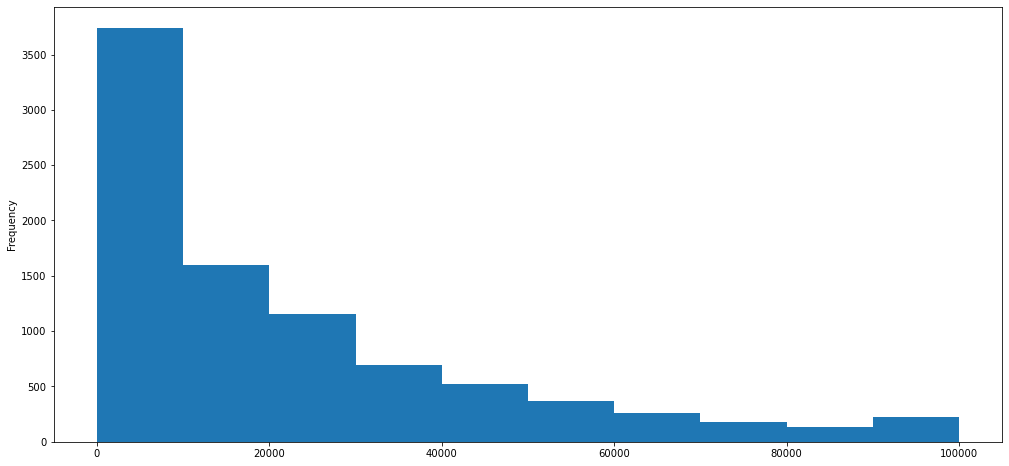

In [54]:
# Histrogram for Size
plt.figure(figsize=[17,8])
df_2.Size.plot.hist()

# From below graph, we can say this graph is the Left Skewed Plot (Negatively Skewed).

# OUTLIER TREACTEMENT

In [55]:
df_2.shape

(8879, 13)

In [56]:
df["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [59]:
df["Price"].value_counts()

0         10040
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$1.29         1
$4.60         1
$15.46        1
$3.28         1
$25.99        1
Name: Price, Length: 93, dtype: int64

In [57]:
df_2["Price"].unique()

array([0, 9, 5, 8, 2, 6, 4, 7, 1], dtype=int64)

In [58]:
df_2['Price'].value_counts()

0    8288
9     575
5       4
6       3
8       3
7       2
4       2
2       1
1       1
Name: Price, dtype: int64

In [60]:
price_L0 = df_2[df_2["Price"] < 0].index
price_L0

Int64Index([], dtype='int64')

In [61]:
price_high = df_2[df_2['Price'] > 9].count()
price_high

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [62]:
# Checking Reviews with very high number of reviews

df_2["Reviews"].unique()

array([1.59000e+02, 9.67000e+02, 8.75100e+04, ..., 6.03000e+02,
       1.19500e+03, 3.98307e+05])

In [63]:
reviews_2m =df_2[df_2["Reviews"] > 2000000].index
reviews_2m

Int64Index([  139,   335,   336,   338,   340,   341,   342,   344,   345,
              347,
            ...
             8445,  8894,  8896,  9140,  9142,  9166,  9841, 10186, 10190,
            10327],
           dtype='int64', length=408)

In [64]:
# Droping reviews more than 2 millions
df_2 = df_2.drop(reviews_2m, inplace = False)

In [65]:
df_2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,0.0,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,0.0,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.0,5000000,0.0,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000,0.0,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,100000,0.0,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7.0,2600.0,500,0.0,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53000.0,5000,0.0,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3600.0,100,0.0,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,3600.0,1000,0.0,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [66]:
df_2.shape

(8471, 13)

In [67]:
# Checking Installs Quantiles

install_quantile = df_2["Installs"].quantile([0.1, 0.25, 0.5, 0.70, 0.9, 0.95, 0.99])
install_quantile

0.10         1000.0
0.25        10000.0
0.50       100000.0
0.70      1000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64

In [68]:
i_quant = df_2[df_2["Installs"] > 10000000.0].index
i_quant
# df_1.drop(i_quant)

Int64Index([    3,   143,   152,   188,   192,   194,   201,   225,   293,
              339,
            ...
            10196, 10200, 10253, 10378, 10408, 10429, 10513, 10549, 10647,
            10707],
           dtype='int64', length=356)

In [69]:
df_2["Installs"].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,        100,        500,         10,
                5,         50,  500000000], dtype=int64)

In [70]:
df_2["Installs"].describe()

count    8.471000e+03
mean     5.937242e+06
std      3.390554e+07
min      5.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [71]:
df_3 = df_2[df_2["Installs"] < 10000000.0].copy()
df_3

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,0.0,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,0.0,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.0,5000000,0.0,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,100000,0.0,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5600.0,50000,0.0,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44.0,619.0,1000,0.0,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7.0,2600.0,500,0.0,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53000.0,5000,0.0,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3600.0,100,0.0,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


In [72]:
df_3.shape

(6996, 13)

# BIVARIATE ANALYSIS

# Scatter plot for Rating vs. Price

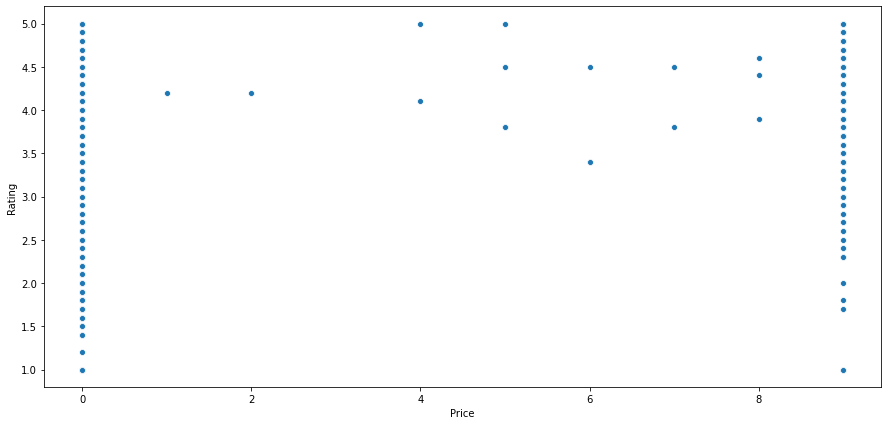

In [73]:

plt.figure(figsize=[15,7])
sns.scatterplot(x="Price", y="Rating", data=df_3)

# Observations - most ratings are lies at price 0 and 9

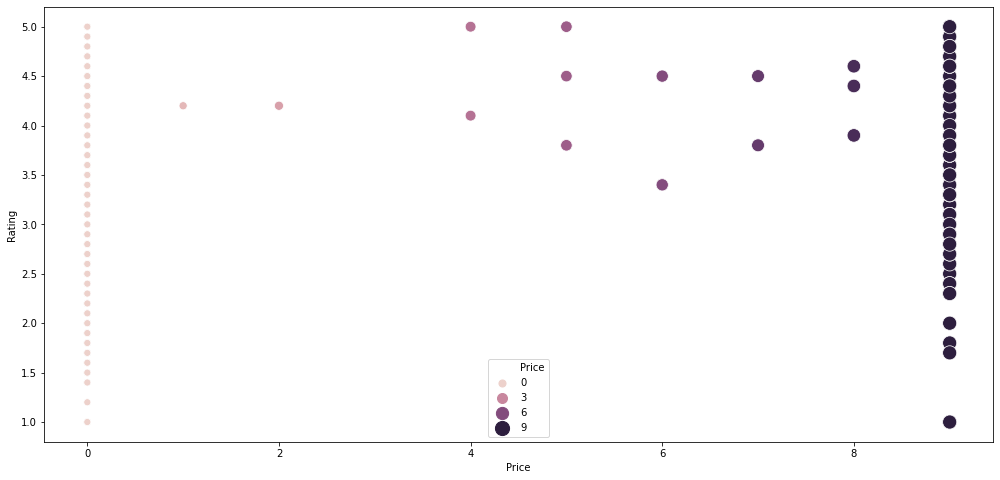

In [74]:
plt.figure(figsize=[17,8])
sns.scatterplot(x="Price", y="Rating",
                hue="Price", size="Price",
                sizes=(50,200),
                data=df_3)

# Scatter plot for Rating vs. Size

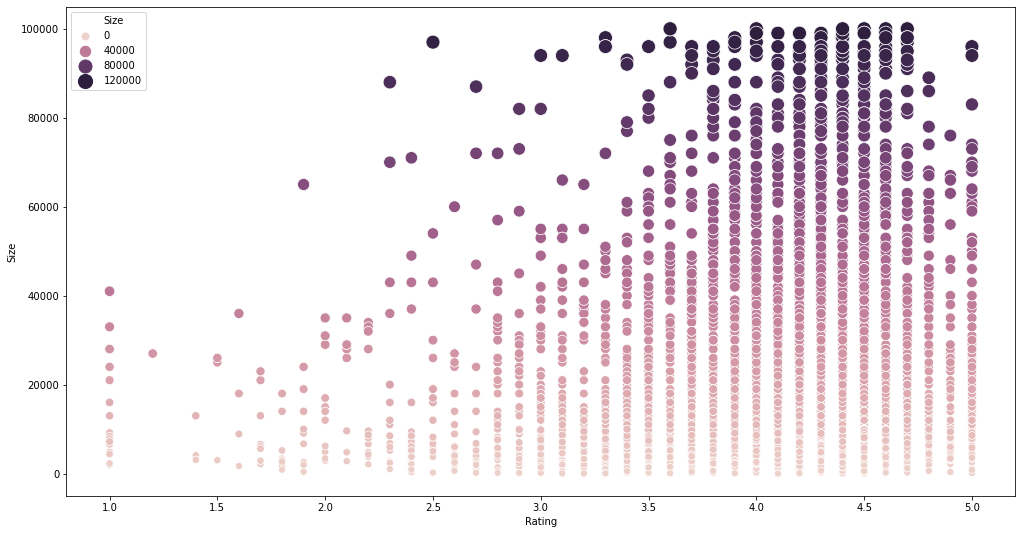

In [75]:
plt.figure(figsize=[17,9])
sns.scatterplot(x="Rating", y="Size",
                hue="Size", size="Size",
                sizes=(50,200),
                data=df_3)

# Observations - for all size the rating is highly concentrated from 3.5 to 5.0.
                # Most dense at 3.9 to 4.6
                # their is very low rating between 1.0 to 2.5 and their is no rating between high size.

# Scatter plot for Rating vs. Reviews

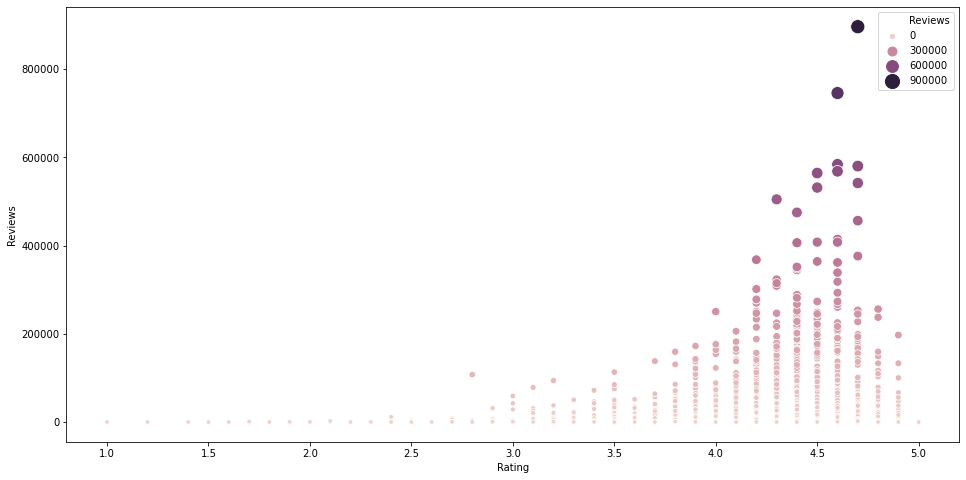

In [76]:
plt.figure(figsize=[16,8])
sns.scatterplot(x="Rating", y="Reviews",
                hue="Reviews", size="Reviews",
                sizes=(20,200),
                data=df_3)

# Observations =
        # we can see from following plot their is very high at 4.3 to 4.7
        # and we can see their is some outliers
        # their is very less or say no reviews at 1.0 to 2.7

# Boxplot for Rating vs. Content Rating

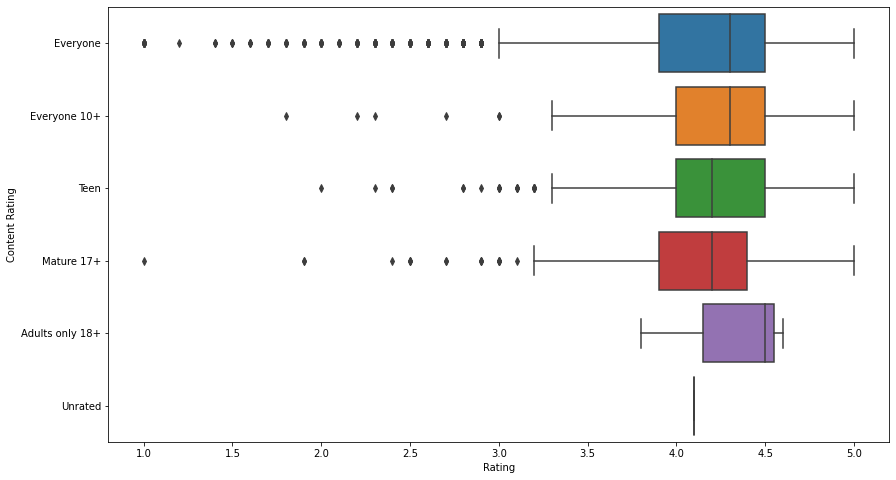

In [77]:
plt.figure(figsize=[14,8])
sns.boxplot(x="Rating", y="Content Rating", hue= None,
            data= df_3, orient="h", dodge=True)

# Observation -
              # we can see many boxplot are 

# Boxplot for Ratings vs. Category

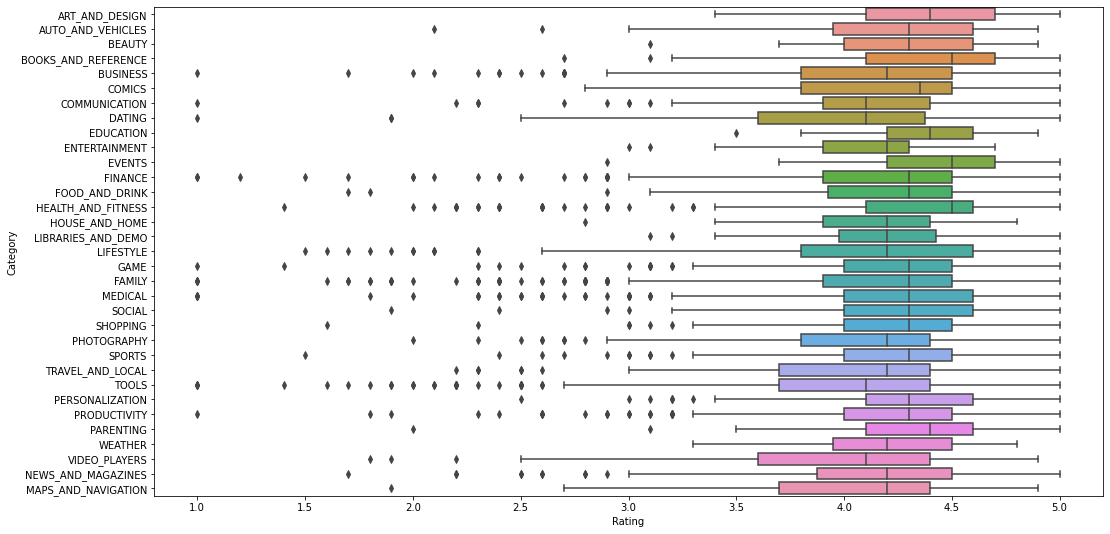

In [78]:
plt.figure(figsize=[17,9])
sns.boxplot(x="Rating", y="Category", hue= None,
            data= df_3, orient="h", dodge=True)

# DATA PREPROCESSING

In [79]:
# Creating DataFrame (df_3) copy as inp_1

inp_1 = df_3.copy()
inp_1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,0.0,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,0.0,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.0,5000000,0.0,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,100000,0.0,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5600.0,50000,0.0,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44.0,619.0,1000,0.0,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7.0,2600.0,500,0.0,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53000.0,5000,0.0,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3600.0,100,0.0,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


In [80]:
inp_1.shape

(6996, 13)

In [81]:

inp_1['Reviews']=np.log1p(inp_1['Reviews'])
inp_1["Reviews"]

0         5.075174
1         6.875232
2        11.379520
4         6.875232
5         5.123964
           ...    
10833     3.806662
10834     2.079442
10836     3.663562
10837     1.609438
10839     4.744932
Name: Reviews, Length: 6996, dtype: float64

In [82]:

inp_1['Installs']=np.log1p(inp_1['Installs'])
inp_1["Installs"]

0         9.210440
1        13.122365
2        15.424949
4        11.512935
5        10.819798
           ...    
10833     6.908755
10834     6.216606
10836     8.517393
10837     4.615121
10839     6.908755
Name: Installs, Length: 6996, dtype: float64

In [83]:
# Dropping columns - App, Last Updated, Current Ver, and Android Ver, as these are not needed for further task.

inp_1.drop(labels = ["App", "Last Updated", "Current Ver", "Android Ver"], axis = 1, inplace = True)

In [84]:
inp_1

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,0.0,0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,0.0,0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,0.0,0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,0.0,0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,5.123964,5600.0,10.819798,0.0,0,Everyone,Art & Design
...,...,...,...,...,...,...,...,...,...
10833,BOOKS_AND_REFERENCE,4.8,3.806662,619.0,6.908755,0.0,0,Everyone,Books & Reference
10834,FAMILY,4.0,2.079442,2600.0,6.216606,0.0,0,Everyone,Education
10836,FAMILY,4.5,3.663562,53000.0,8.517393,0.0,0,Everyone,Education
10837,FAMILY,5.0,1.609438,3600.0,4.615121,0.0,0,Everyone,Education


In [85]:
inp_1.shape

(6996, 9)

# GETTING DUMMIES OF CATEGORY, GENRES & CONTENT RATING

In [86]:
inp_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6996 entries, 0 to 10839
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        6996 non-null   object 
 1   Rating          6996 non-null   float64
 2   Reviews         6996 non-null   float64
 3   Size            6996 non-null   float64
 4   Installs        6996 non-null   float64
 5   Type            6996 non-null   float64
 6   Price           6996 non-null   int64  
 7   Content Rating  6996 non-null   object 
 8   Genres          6996 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 546.6+ KB


In [87]:
# Cleaning Categories into integers
CategoryString = inp_1["Category"]
categoryVal = inp_1["Category"].unique()
categoryValCount = len(categoryVal)
category_dict = {}
for i in range(0,categoryValCount):
    category_dict[categoryVal[i]] = i
inp_1["Category"] = inp_1["Category"].map(category_dict).astype(float)

In [90]:
# Converting of content rating classification

RatingL = inp_1['Content Rating'].unique()
RatingDict = {}
for i in range(len(RatingL)):
    RatingDict[RatingL[i]] = i
inp_1['Content Rating'] = inp_1['Content Rating'].map(RatingDict).astype(int)

# inp_1['Content Rating'] = inp_1['Content Rating'].astype(float)

In [91]:
# Converting of genres to float

GenresL = df.Genres.unique()
GenresDict = {}
for i in range(len(GenresL)):
    GenresDict[GenresL[i]] = i
inp_1['Genres'] = inp_1['Genres'].map(GenresDict).astype(int)

#inp_1['Genres'] = inp_1['Genres'].astype(float)

In [92]:
inp_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6996 entries, 0 to 10839
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        6996 non-null   float64
 1   Rating          6996 non-null   float64
 2   Reviews         6996 non-null   float64
 3   Size            6996 non-null   float64
 4   Installs        6996 non-null   float64
 5   Type            6996 non-null   float64
 6   Price           6996 non-null   int64  
 7   Content Rating  6996 non-null   int32  
 8   Genres          6996 non-null   int32  
dtypes: float64(6), int32(2), int64(1)
memory usage: 491.9 KB


In [93]:
inp_1

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,0.0,4.1,5.075174,19000.0,9.210440,0.0,0,0,0
1,0.0,3.9,6.875232,14000.0,13.122365,0.0,0,0,1
2,0.0,4.7,11.379520,8700.0,15.424949,0.0,0,0,0
4,0.0,4.3,6.875232,2800.0,11.512935,0.0,0,0,2
5,0.0,4.4,5.123964,5600.0,10.819798,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...
10833,3.0,4.8,3.806662,619.0,6.908755,0.0,0,0,6
10834,18.0,4.0,2.079442,2600.0,6.216606,0.0,0,0,13
10836,18.0,4.5,3.663562,53000.0,8.517393,0.0,0,0,13
10837,18.0,5.0,1.609438,3600.0,4.615121,0.0,0,0,13


In [94]:
inp_2 = pd.get_dummies(inp_1, columns = ['Category','Genres','Content Rating'])
inp_2

,Rating,Reviews,Size,Installs,Type,Price,Category_0.0,Category_1.0,Category_2.0,Category_3.0,...,Genres_115,Genres_116,Genres_117,Genres_119,Content Rating_0,Content Rating_1,Content Rating_2,Content Rating_3,Content Rating_4,Content Rating_5
0,4.1,5.075174,19000.0,9.210440,0.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,0.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,4.7,11.379520,8700.0,15.424949,0.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,4.3,6.875232,2800.0,11.512935,0.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,4.4,5.123964,5600.0,10.819798,0.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,4.8,3.806662,619.0,6.908755,0.0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
10834,4.0,2.079442,2600.0,6.216606,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10836,4.5,3.663562,53000.0,8.517393,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10837,5.0,1.609438,3600.0,4.615121,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [95]:
inp_2.shape

(6996, 155)

In [96]:
list(inp_2.columns)

['Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Category_0.0',
 'Category_1.0',
 'Category_2.0',
 'Category_3.0',
 'Category_4.0',
 'Category_5.0',
 'Category_6.0',
 'Category_7.0',
 'Category_8.0',
 'Category_9.0',
 'Category_10.0',
 'Category_11.0',
 'Category_12.0',
 'Category_13.0',
 'Category_14.0',
 'Category_15.0',
 'Category_16.0',
 'Category_17.0',
 'Category_18.0',
 'Category_19.0',
 'Category_20.0',
 'Category_21.0',
 'Category_22.0',
 'Category_23.0',
 'Category_24.0',
 'Category_25.0',
 'Category_26.0',
 'Category_27.0',
 'Category_28.0',
 'Category_29.0',
 'Category_30.0',
 'Category_31.0',
 'Category_32.0',
 'Genres_0',
 'Genres_1',
 'Genres_2',
 'Genres_4',
 'Genres_5',
 'Genres_6',
 'Genres_7',
 'Genres_8',
 'Genres_9',
 'Genres_10',
 'Genres_11',
 'Genres_12',
 'Genres_13',
 'Genres_14',
 'Genres_15',
 'Genres_16',
 'Genres_17',
 'Genres_18',
 'Genres_19',
 'Genres_20',
 'Genres_21',
 'Genres_22',
 'Genres_23',
 'Genres_24',
 'Genres_25',
 'Genres_26

# Train - Test Split - apply 70-30 split

In [97]:
df_train, df_test = train_test_split(inp_2, train_size = 0.7, random_state = 100)

In [98]:
# Separate X and Y for df_train and df_test

y_train = df_train
X_train = df_train
y_test = df_test
X_test = df_test

# Model building

# Linear regression

In [99]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.coef_)
lr.intercept_

[[ 1.00000000e+00 -5.48672427e-13 -1.39096037e-16 ...  2.11087591e-11
   1.82046732e-13 -1.96295939e-12]
 [ 3.86998724e-12  1.00000000e+00  1.11022302e-16 ...  3.52327210e-11
   5.45288370e-13 -2.99313894e-12]
 [ 1.29203869e-12 -2.48712162e-12  1.00000000e+00 ... -1.57677680e-12
   1.23481971e-12  2.47642882e-12]
 ...
 [ 1.97580810e-14 -1.44905001e-14  0.00000000e+00 ...  8.33333333e-01
  -1.66666667e-01 -1.66666667e-01]
 [ 2.49642260e-15 -9.16294778e-16 -1.62630326e-19 ... -1.66666667e-01
   8.33333333e-01 -1.66666667e-01]
 [ 1.58978056e-16  2.48996115e-16  3.38813179e-21 ... -1.66666667e-01
  -1.66666667e-01  8.33333333e-01]]


array([-1.61239910e-11, -1.34425804e-11, -7.27595761e-12,  2.59703370e-11,
        6.49577614e-13,  8.51230197e-12,  4.67718269e-02,  2.54493764e-02,
        2.54493764e-02,  2.54493764e-02,  2.54493764e-02,  3.39325018e-02,
        2.54493763e-02,  2.54493764e-02,  4.67718269e-02,  4.67718269e-02,
        2.54493764e-02,  2.54493764e-02,  2.54493764e-02,  2.54493764e-02,
        2.54493764e-02,  2.54493764e-02,  2.54493764e-02,  4.67718268e-02,
        4.67718268e-02,  2.54493764e-02,  2.54493764e-02,  2.54493764e-02,
        2.54493764e-02,  4.67718268e-02,  3.39325018e-02,  2.54493764e-02,
        2.54493764e-02,  2.54493764e-02,  4.07190022e-02,  2.54493764e-02,
        2.54493764e-02,  2.54493764e-02,  2.54493764e-02,  4.12692590e-03,
        0.00000000e+00,  4.12692590e-03,  2.54493764e-02,  2.54493764e-02,
        2.54493764e-02,  2.54493764e-02,  1.69662509e-02,  1.69662509e-02,
        2.54493763e-02,  2.54493764e-02,  4.12692590e-03,  4.12692590e-03,
        4.12692590e-03,  

Coefficients: 
 [[ 1.00000000e+00 -5.48672427e-13 -1.39096037e-16 ...  2.11087591e-11
   1.82046732e-13 -1.96295939e-12]
 [ 3.86998724e-12  1.00000000e+00  1.11022302e-16 ...  3.52327210e-11
   5.45288370e-13 -2.99313894e-12]
 [ 1.29203869e-12 -2.48712162e-12  1.00000000e+00 ... -1.57677680e-12
   1.23481971e-12  2.47642882e-12]
 ...
 [ 1.97580810e-14 -1.44905001e-14  0.00000000e+00 ...  8.33333333e-01
  -1.66666667e-01 -1.66666667e-01]
 [ 2.49642260e-15 -9.16294778e-16 -1.62630326e-19 ... -1.66666667e-01
   8.33333333e-01 -1.66666667e-01]
 [ 1.58978056e-16  2.48996115e-16  3.38813179e-21 ... -1.66666667e-01
  -1.66666667e-01  8.33333333e-01]]
Mean squared error: 0.00
Coefficient of determination: 0.79


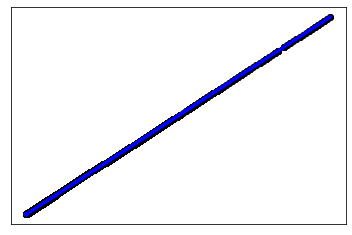

In [108]:

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs

plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [120]:
predictions = lr.predict(X_test)
print(mean_squared_error(y_test, predictions))

4.516052303504821e-05


In [109]:
# Reporting r2 for the model

y_train_pred= lr.predict(X_train)
r2_score(y_train, y_train_pred)

1.0

# Make predictions on test set, report R2

In [110]:
y_test_pred= lr.predict(X_test)
r2_score(y_test, y_test_pred)

0.7866070014432011

In [111]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [112]:
# Ridge Regrration

ridgeReg = Ridge(alpha=0.001, normalize=True)
ridgeReg.fit(X_train,y_train)
print(mean_squared_error(y_train, ridgeReg.predict(X_train)))
print(mean_squared_error(y_test, ridgeReg.predict(X_test)))
print('R2 Value/Coefficient of Determination: {}'.format(ridgeReg.score(X_test, y_test)))

4.325697583819522
3.8667924355902636
R2 Value/Coefficient of Determination: 0.7868545491488296


In [113]:
# Lasso Regression - 

lassoreg = Lasso(alpha=0.001, normalize=True)
lassoreg.fit(X_train, y_train)

print(mean_squared_error(y_train, lassoreg.predict(X_train)))
print(mean_squared_error(y_test, lassoreg.predict(X_test)))
print('R2 Value/Coefficient of Determination: {}'.format(lassoreg.score(X_test, y_test)))

C:\Users\sharmila_biyani\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(


0.2689476633219505
0.26779822973667505
R2 Value/Coefficient of Determination: 0.378043875277933


In [114]:
# ElasticNet

Elas = ElasticNet(alpha=0.001, normalize=True)
Elas.fit(X_train, y_train)

print(mean_squared_error(y_train, Elas.predict(X_train)))
print(mean_squared_error(y_test, Elas.predict(X_test)))
print('R2 Value/Coefficient of Determination: {}'.format(Elas.score(X_test, y_test)))

C:\Users\sharmila_biyani\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(


1334665.6485920711
1149403.3565857415
R2 Value/Coefficient of Determination: 0.2985374064693751
